In [1]:
import torch
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from dataset import GallBladderDataset
from torch.optim.lr_scheduler import CosineAnnealingLR
import torch.nn.functional as F
import torchvision.models as models
import torchsummary as summary
from model import UNET
from utils import (
    save_checkpoint,
    load_checkpoint,
    get_mean_std,
    get_transforms_value,
    get_test_loader,
    get_loaders,
    check_accuracy,
)
import torchvision.transforms as transforms

# hyperparameters etc.

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 1
NUM_WORKERS = 12
PIN_MEMORY = True

TEST_IMG_DIR = "./brain/test/images/"
TEST_MASK_DIR = "./brain/test/masks/"


model = UNET(in_channels=1, out_channels=1).to(DEVICE)
load_checkpoint(torch.load("my_checkpoint.pth.tar"), model)

test_ds = GallBladderDataset(
    image_dir=TEST_IMG_DIR,
    mask_dir=TEST_MASK_DIR,
    transform=transforms.Compose([transforms.ToTensor()]),
)
test_mean, test_std = get_mean_std(test_ds)
test_transforms = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(torch.Tensor(test_mean), torch.Tensor(test_std)),
    ]
)
test_loader = get_test_loader(TEST_IMG_DIR, TEST_MASK_DIR, BATCH_SIZE, test_transforms)

check_accuracy(test_loader, model, DEVICE)


C:\Users\ytche\AppData\Local\Temp\ipykernel_21700\3376775296.py:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_checkpoint(torch.load("my_checkpoint.pth.tar"), model)

=> Loading checkpoint
=> Loaded checkpoint successfully
3605


100%|██████████| 3605/3605 [01:16<00:00, 47.21it/s]

Got 368286988/369152000 with Pixel Accuracy 0.9976567625999451
Dice Coefficient:0.922918438911438


(tensor(0.9977, device='cuda:0'), tensor(0.9229, device='cuda:0'))

In [1]:
import numpy as np

# 加载图像数据
img_data = np.load('.\\brain\\t2_flair_selected_320\\100032.npy')

# 检查数据类型
img_dtype = img_data.dtype
print(f'The image data type is: {img_dtype}')

# 检查数据的最小值和最大值
min_value = img_data.min()
max_value = img_data.max()
print(f'Minimum value: {min_value}')
print(f'Maximum value: {max_value}')

# 根据数据类型和范围推算比特深度
if img_dtype == np.uint8:
    print('This is an 8-bit image.')
elif img_dtype == np.uint16:
    print('This is a 16-bit image.')
elif img_dtype == np.float32 or img_dtype == np.float64:
    if min_value >= 0 and max_value <= 1:
        print('This is a floating point image with normalized values (usually 32 or 64 bit).')
    else:
        print('This is a floating point image with non-normalized values (usually 32 or 64 bit).')
else:
    print('Unknown bit depth or data type.')

The image data type is: float64
Minimum value: -32.524752616882324
Maximum value: 322.1564054489136
This is a floating point image with non-normalized values (usually 32 or 64 bit).


Running for n_bits=2


100%|██████████| 3605/3605 [01:05<00:00, 54.80it/s]


Got 332747794/369152000 with Pixel Accuracy 0.9013842940330505
Dice Coefficient:0.20214277505874634
n_bits=2, PC=0.9013842940330505, Dice=0.20214277505874634
Running for n_bits=4


100%|██████████| 3605/3605 [01:04<00:00, 56.30it/s]


Got 330666237/369152000 with Pixel Accuracy 0.8957455158233643
Dice Coefficient:0.5995507836341858
n_bits=4, PC=0.8957455158233643, Dice=0.5995507836341858
Running for n_bits=6


100%|██████████| 3605/3605 [01:04<00:00, 55.88it/s]


Got 356315559/369152000 with Pixel Accuracy 0.9652272462844849
Dice Coefficient:0.8131253719329834
n_bits=6, PC=0.9652272462844849, Dice=0.8131253719329834
Running for n_bits=8


100%|██████████| 3605/3605 [01:04<00:00, 56.17it/s]


Got 368215960/369152000 with Pixel Accuracy 0.9974644184112549
Dice Coefficient:0.9220286011695862
n_bits=8, PC=0.9974644184112549, Dice=0.9220286011695862
Running for n_bits=10


100%|██████████| 3605/3605 [01:04<00:00, 56.17it/s]


Got 368270485/369152000 with Pixel Accuracy 0.9976121187210083
Dice Coefficient:0.9228744506835938
n_bits=10, PC=0.9976121187210083, Dice=0.9228744506835938
Running for n_bits=12


100%|██████████| 3605/3605 [01:04<00:00, 56.31it/s]


Got 368283340/369152000 with Pixel Accuracy 0.9976468682289124
Dice Coefficient:0.9228531122207642
n_bits=12, PC=0.9976468682289124, Dice=0.9228531122207642
Running for n_bits=14


100%|██████████| 3605/3605 [01:03<00:00, 56.50it/s]


Got 368286192/369152000 with Pixel Accuracy 0.9976546764373779
Dice Coefficient:0.9229004979133606
n_bits=14, PC=0.9976546764373779, Dice=0.9229004979133606
Running for n_bits=16


100%|██████████| 3605/3605 [01:03<00:00, 56.36it/s]


Got 368287021/369152000 with Pixel Accuracy 0.9976568222045898
Dice Coefficient:0.9229176640510559
n_bits=16, PC=0.9976568222045898, Dice=0.9229176640510559
Running for n_bits=18


100%|██████████| 3605/3605 [01:03<00:00, 56.34it/s]


Got 368286952/369152000 with Pixel Accuracy 0.9976566433906555
Dice Coefficient:0.9229215383529663
n_bits=18, PC=0.9976566433906555, Dice=0.9229215383529663
Running for n_bits=20


100%|██████████| 3605/3605 [01:03<00:00, 56.49it/s]


Got 368286978/369152000 with Pixel Accuracy 0.9976567625999451
Dice Coefficient:0.9229188561439514
n_bits=20, PC=0.9976567625999451, Dice=0.9229188561439514
Running for n_bits=22


100%|██████████| 3605/3605 [01:03<00:00, 56.39it/s]


Got 368286962/369152000 with Pixel Accuracy 0.9976567625999451
Dice Coefficient:0.9229175448417664
n_bits=22, PC=0.9976567625999451, Dice=0.9229175448417664
Running for n_bits=24


100%|██████████| 3605/3605 [01:03<00:00, 56.48it/s]


Got 368286938/369152000 with Pixel Accuracy 0.9976566433906555
Dice Coefficient:0.9229163527488708
n_bits=24, PC=0.9976566433906555, Dice=0.9229163527488708
Running for n_bits=26


100%|██████████| 3605/3605 [01:03<00:00, 56.35it/s]


Got 368286980/369152000 with Pixel Accuracy 0.9976567625999451
Dice Coefficient:0.9229211211204529
n_bits=26, PC=0.9976567625999451, Dice=0.9229211211204529
Running for n_bits=28


100%|██████████| 3605/3605 [01:03<00:00, 56.50it/s]


Got 368286980/369152000 with Pixel Accuracy 0.9976567625999451
Dice Coefficient:0.9229217767715454
n_bits=28, PC=0.9976567625999451, Dice=0.9229217767715454
Running for n_bits=30


100%|██████████| 3605/3605 [01:03<00:00, 56.39it/s]


Got 368286980/369152000 with Pixel Accuracy 0.9976567625999451
Dice Coefficient:0.9229217767715454
n_bits=30, PC=0.9976567625999451, Dice=0.9229217767715454
Running for n_bits=32


100%|██████████| 3605/3605 [01:03<00:00, 56.47it/s]


Got 360762453/369152000 with Pixel Accuracy 0.9772735238075256
Dice Coefficient:0.6621206998825073
n_bits=32, PC=0.9772735238075256, Dice=0.6621206998825073


100%|██████████| 3605/3605 [01:03<00:00, 56.89it/s]


Got 368286988/369152000 with Pixel Accuracy 0.9976567625999451
Dice Coefficient:0.922918438911438


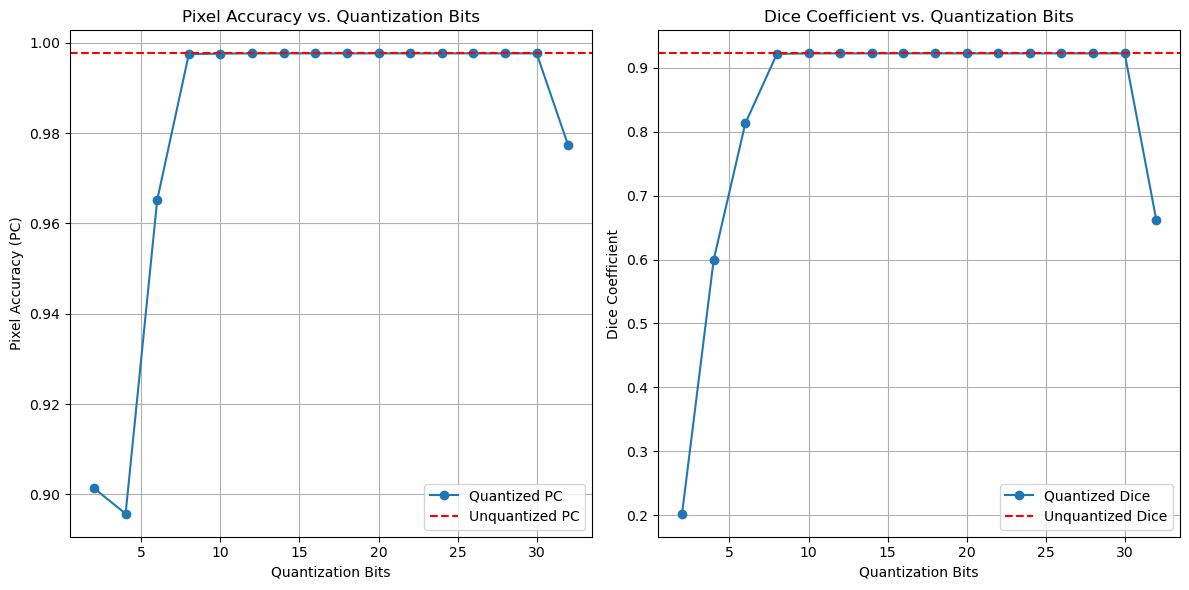

In [8]:
# print(model)

# # 钩子函数定义
# def hook_fn(module, input, output):
#     global original_output
#     original_output = output.clone().detach()  
#     # tmp=output
#     tensor_min, tensor_max = output.min(), output.max()
#     normalized_tensor = (output - tensor_min) / (tensor_max - tensor_min)
#     scaled_tensor = normalized_tensor * (2**4 - 1)
#     quantized_tensor = torch.round(scaled_tensor).int()  # 转为整数
#     tmp = quantized_tensor.float() / (2**4 - 1) * (tensor_max - tensor_min) + tensor_min
#     return tmp

# # 注册钩子函数
# model.conv1.register_forward_hook(hook_fn)

# PC,Dice=check_accuracy(test_loader, model, DEVICE)

def hook_fn(module, input, output, n_bits):
    global original_output
    original_output = output.clone().detach() 

    tensor_min, tensor_max = output.min(), output.max()
    normalized_tensor = (output - tensor_min) / (tensor_max - tensor_min)
    scaled_tensor = normalized_tensor * (2**n_bits - 1)
    quantized_tensor = torch.round(scaled_tensor).int()  # 转为整数
    tmp = quantized_tensor.float() / (2**n_bits - 1) * (tensor_max - tensor_min) + tensor_min
    return tmp

class QuantizeHook:
    def __init__(self, n_bits):
        self.n_bits = n_bits

    def __call__(self, module, input, output):
        return hook_fn(module, input, output, self.n_bits)

results = {}
n_bits_list = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]  # 不同量化阶数

for n_bits in n_bits_list:
    print(f"Running for n_bits={n_bits}")
    
    # 移除之前的钩子（如果有）
    if hasattr(model.conv1, '_forward_hooks'):
        model.conv1._forward_hooks.clear()

    # 注册新的钩子
    quantize_hook = QuantizeHook(n_bits)
    model.conv1.register_forward_hook(quantize_hook)

    # 评估模型
    PC, Dice = check_accuracy(test_loader, model, DEVICE)
    results[n_bits] = (PC, Dice)

    print(f"n_bits={n_bits}, PC={PC}, Dice={Dice}")
    
if hasattr(model.conv1, '_forward_hooks'):
    model.conv1._forward_hooks.clear()
unquantized_PC,unquantized_Dice=check_accuracy(test_loader, model, DEVICE)

unquantized_PC=unquantized_PC.cpu().numpy()
unquantized_Dice=unquantized_Dice.cpu().numpy()

n_bits = list(results.keys())
quantized_PC = [result[0].cpu().numpy() for result in results.values()]
quantized_Dice = [result[1].cpu().numpy() for result in results.values()]

plt.figure(figsize=(12, 6))

# Pixel Accuracy (PC) 图
plt.subplot(1, 2, 1)
plt.plot(n_bits, quantized_PC, marker='o', label='Quantized PC')
plt.axhline(y=unquantized_PC, color='r', linestyle='--', label='Unquantized PC')
plt.title('Pixel Accuracy vs. Quantization Bits')
plt.xlabel('Quantization Bits')
plt.ylabel('Pixel Accuracy (PC)')
plt.legend()
plt.grid()

# Dice Coefficient 图
plt.subplot(1, 2, 2)
plt.plot(n_bits, quantized_Dice, marker='o', label='Quantized Dice')
plt.axhline(y=unquantized_Dice, color='r', linestyle='--', label='Unquantized Dice')
plt.title('Dice Coefficient vs. Quantization Bits')
plt.xlabel('Quantization Bits')
plt.ylabel('Dice Coefficient')
plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig("bit_to_dice_on_test_dataset.png", dpi=1024, bbox_inches='tight', pad_inches=0)
plt.show()

In [7]:
plt.figure(figsize=(6, 5))

# Dice Coefficient 图
new_quantized_Dice = quantized_Dice[0:15] + [quantized_Dice[14]]

plt.plot(n_bits, new_quantized_Dice, marker='o', label='Quantized Dice')
plt.axhline(y=unquantized_Dice, color='r', linestyle='--', label='Unquantized Dice')
plt.title('Dice Coefficient vs. Quantization Bits',fontsize=15)
plt.xlabel('Quantization Bits',fontsize=15,fontweight='bold')
plt.ylabel('Dice Coefficient',fontsize=15,fontweight='bold')
plt.legend(fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.grid()

plt.tight_layout()
plt.savefig("bit_to_dice_on_test_dataset.png", dpi=1024, bbox_inches='tight', pad_inches=0)
plt.show()

NameError: name 'quantized_Dice' is not defined

<Figure size 600x500 with 0 Axes>

In [ ]:
def check_accuracy_with_per_image_dice(loader, model, device="cuda", bit_depth=8):
    num_correct = 0
    num_pixels = 0
    dice_score = 0
    per_image_dice_scores = []  # 用于存储每张图片的 Dice 系数
    model.eval()
    hook_handle = model.conv1.register_forward_hook(lambda module, input, output: hook_fn(module, input, output, bit_depth))

    with torch.no_grad():
        loop = tqdm(loader)
  
        for x, y in loop:
            x = x.to(device)
            y = y.to(device).unsqueeze(1)
        
            preds = torch.sigmoid(model(x))
            preds = (preds > 0.5).float()
            
            num_correct += (preds == y).sum()
            num_pixels += torch.numel(preds)
            dice_score += (2 * (preds * y).sum()) / ((preds + y).sum() + 1e-8)        

            batch_size = x.size(0)
            for i in range(batch_size):
                pred_single = preds[i]
                y_single = y[i]
                dice_single = (2 * (pred_single * y_single).sum()) / ((pred_single + y_single).sum() + 1e-8)
                per_image_dice_scores.append(dice_single.item())
                
    hook_handle.remove()
    Pixel_Accuracy = num_correct / num_pixels
    Dice_Coefficient = dice_score / len(loader)

    return Pixel_Accuracy, Dice_Coefficient, per_image_dice_scores

def hook_fn(module, input, output, n_bits):
    global original_output
    original_output = output.clone().detach() 

    tensor_min, tensor_max = output.min(), output.max()
    normalized_tensor = (output - tensor_min) / (tensor_max - tensor_min)
    scaled_tensor = normalized_tensor * (2**n_bits - 1)
    quantized_tensor = torch.round(scaled_tensor).int()  # 转为整数
    tmp = quantized_tensor.float() / (2**n_bits - 1) * (tensor_max - tensor_min) + tensor_min
    return tmp

Pixel_Accuracy_4, Dice_Coefficient_4, dice_4bit_per_image = check_accuracy_with_per_image_dice(test_loader, model, device="cuda",bit_depth=4)
Pixel_Accuracy_8, Dice_Coefficient_8, dice_8bit_per_image = check_accuracy_with_per_image_dice(test_loader, model, device="cuda",bit_depth=8)



In [ ]:
import numpy as np
valid_indices = [i for i, dice in enumerate(dice_8bit_per_image) if dice > 0.9]

dice_difference = [(d8 - d4) for d4, d8 in zip(dice_4bit_per_image, dice_8bit_per_image)]

closest_diff_indices = np.array(valid_indices)[np.argsort([abs(dice_difference[i] - 0.4) for i in valid_indices])[:2]]


# plt.figure(figsize=(10, 6))
# plt.plot(dice_4bit_per_image, label='4-bit Quantization', color='b', linestyle='-', marker='o')
# plt.plot(dice_8bit_per_image, label='8-bit Quantization', color='r', linestyle='-', marker='x')
# plt.xlabel('Image Index')
# plt.ylabel('Dice Coefficient')
# plt.title('Dice Coefficient Comparison between 4-bit and 8-bit Quantization')
# plt.legend()
# plt.grid(True)
# plt.show()

# 打印差异最大的 2 张图片的索引和差异
print("Images with Dice difference closest to 0.4:")
for idx in closest_diff_indices:
    print(f"Image Index: {idx}, Dice Difference: {dice_difference[idx]:.4f}")
    
    # 获取差异最大的图片（假设 test_loader.dataset 是一个包含图片的列表，且每张图片是 [image, target] 对）
    max_diff_image, max_diff_target = test_loader.dataset[idx]
    
    # 可视化该图片
    plt.imshow(max_diff_image.cpu().numpy()[0], cmap='gray')  # 转换为可显示格式
    plt.title(f"Dice: {dice_8bit_per_image[idx]:.4f}")
    plt.show()
    tmp=max_diff_image.cpu().numpy()[0]
    np.savetxt(f"output_{idx}.csv", tmp, delimiter=",", fmt="%.2f", comments="")


In [3]:
# print(model)
import numpy as np
weight = model.conv1.weight
weight = weight.detach().cpu().numpy().squeeze()

print(weight)

closest_diff_indices = [1480,2967]

for batch_idx, (x, y) in enumerate(test_loader):
    if batch_idx == closest_diff_indices[0]:
        x = x.to(DEVICE)
        y = y.to(DEVICE).unsqueeze(1)
        tmp = x.cpu().numpy().squeeze()
        # output_conv_1= np.convolve(x, weight, 'valid')
        
        
from scipy.signal import convolve2d
output_conv_1= convolve2d(tmp, weight, 'valid')
# print(model)

[[-0.3693022  -0.01066846 -0.1258502 ]
 [-0.3631103   0.06318058  0.12932211]
 [-0.07583695 -0.01936208  0.23523524]]


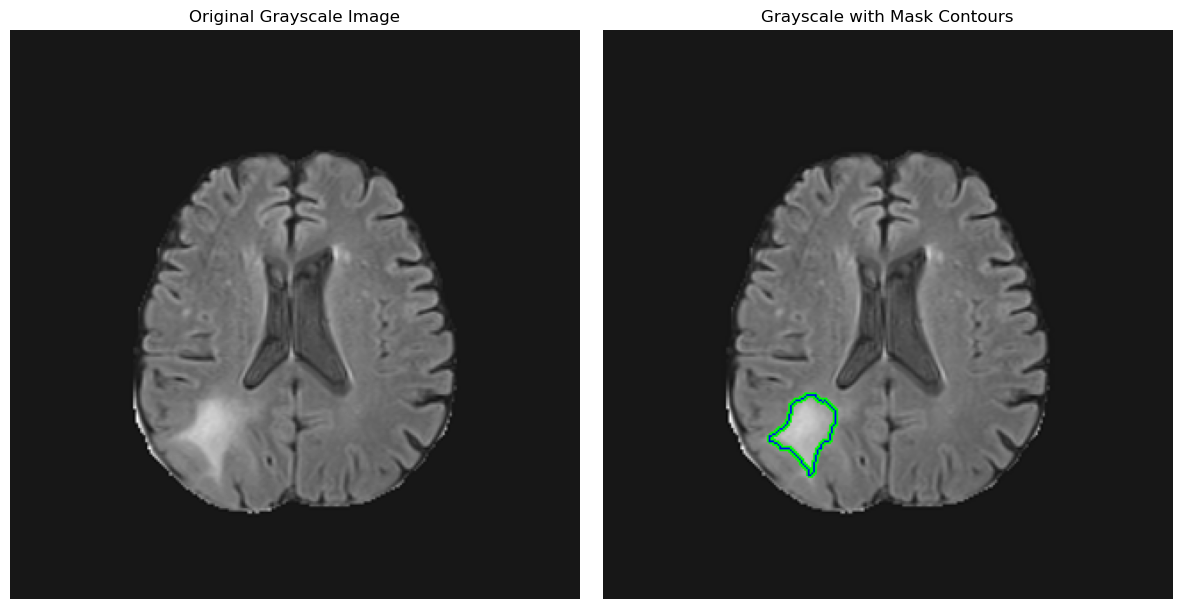

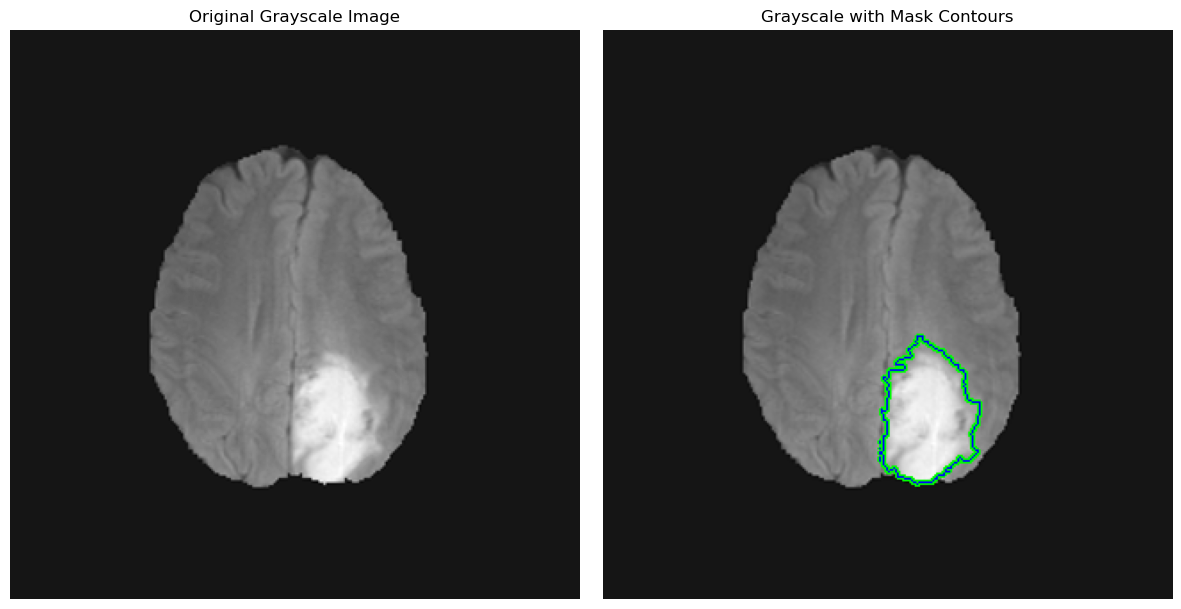

In [4]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
import os

 
def draw_mask_contours_on_grayscale(image, mask, color=(255, 0, 0), thickness=2): 
    """ 
    在灰度图上绘制分割掩膜的轮廓 
 
    Args: 
        image (numpy.ndarray): 输入的灰度图像。 
        mask (numpy.ndarray): 分割掩膜（灰度图，非二值也可）。 
        color (tuple): 轮廓颜色，默认为红色 (255, 0, 0)。 
        thickness (int): 轮廓线的粗细，默认为2。 
 
    Returns: 
        numpy.ndarray: 带有轮廓的灰度图（伪彩色）。 
    """ 
    # 确保图像是 uint8 类型
    if image.dtype != np.uint8:
        image_min = image.min() 
        image_max = image.max() 
        normalized_image = (image - image_min) / (image_max - image_min)  # 归一化到0到1 
        image = np.clip(normalized_image * 255, 0, 255).astype(np.uint8)  # 将图像范围调整到0到255并转换为np.uint8类型
    
    # 如果是灰度图，将其转换为彩色图像
    if len(image.shape) == 2:  
        image_colored = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  
    else:
        image_colored = image  # 如果已经是彩色图
    
    # 将掩膜转为二值图
    binary_mask = (mask > 0).astype(np.uint8) * 255  # 转换为0和255  
    
    # 找到轮廓  
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  
    
    # 绘制轮廓到图像上  
    image_with_contours = cv2.drawContours(image_colored, contours, -1, color, thickness)  
    
    return image_with_contours  

def get_nth_file(path,n):
    # 获取当前目录下的所有文件和文件夹
    all_items = os.listdir(path)
    # 过滤出文件
    files = [f for f in all_items if os.path.isfile(f)]
    # 按文件名排序
    files.sort()
    
    # 检查n是否超出范围
    if n <= 0 or n > len(files):
        return None
    
    # 返回第n个文件
    return files[n - 1]


# 加载npy文件 
# gray_image = np.load("brain/test/images/100035.npy")  # 灰度图像 
# mask = np.load("brain/test/masks/100035.npy")  # 掩膜 
for idx in closest_diff_indices:
    max_diff_image, max_diff_target = test_loader.dataset[idx]
    gray_image=max_diff_image.cpu().numpy()[0]
    mask=max_diff_target
    # gray_image=get_nth_file(TEST_IMG_DIR,idx)
    # mask=get_nth_file(TEST_MASK_DIR,idx)
    
    
    # 在灰度图像上绘制掩膜轮廓 
    result_image = draw_mask_contours_on_grayscale(gray_image, mask, color=(0, 255, 0), thickness=2) 
    result_image = draw_mask_contours_on_grayscale(result_image, mask, color=(255, 0, 0), thickness=1) 
    
    # 可视化灰度图像和结果 
    plt.figure(figsize=(12, 6)) 
    
    # 显示原始灰度图像 
    plt.subplot(1, 2, 1) 
    plt.imshow(gray_image, cmap="gray") 
    plt.title("Original Grayscale Image") 
    plt.axis("off") 
    
    # 显示带轮廓的图像 
    plt.subplot(1, 2, 2) 
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))  # OpenCV的BGR格式转换为RGB 
    plt.title("Grayscale with Mask Contours") 
    plt.axis("off") 
    
    # 显示图像 
    plt.tight_layout() 
    plt.show()


In [12]:
import pandas as pd
import torch

csv_file_path = "o_quant.csv"  # 替换为你的 CSV 文件路径
df = pd.read_csv(csv_file_path, header=None)

tensor = torch.tensor(df.values, dtype=torch.float32)
cuda_tensor = tensor.cuda()

# 打印结果
print("Original Tensor (CPU):", tensor)
print("CUDA Tensor (GPU):", cuda_tensor)

output_o_1480 = cuda_tensor+model.conv1.bias

Original Tensor (CPU): tensor([[0.2989, 0.2989, 0.2989,  ..., 0.2989, 0.2989, 0.2989],
        [0.2989, 0.2989, 0.2989,  ..., 0.2989, 0.2989, 0.2989],
        [0.2989, 0.2989, 0.2989,  ..., 0.2989, 0.2989, 0.2989],
        ...,
        [0.2989, 0.2989, 0.2989,  ..., 0.2989, 0.2989, 0.2989],
        [0.2989, 0.2989, 0.2989,  ..., 0.2989, 0.2989, 0.2989],
        [0.2989, 0.2989, 0.2989,  ..., 0.2989, 0.2989, 0.2989]])
CUDA Tensor (GPU): tensor([[0.2989, 0.2989, 0.2989,  ..., 0.2989, 0.2989, 0.2989],
        [0.2989, 0.2989, 0.2989,  ..., 0.2989, 0.2989, 0.2989],
        [0.2989, 0.2989, 0.2989,  ..., 0.2989, 0.2989, 0.2989],
        ...,
        [0.2989, 0.2989, 0.2989,  ..., 0.2989, 0.2989, 0.2989],
        [0.2989, 0.2989, 0.2989,  ..., 0.2989, 0.2989, 0.2989],
        [0.2989, 0.2989, 0.2989,  ..., 0.2989, 0.2989, 0.2989]],
       device='cuda:0')


In [5]:
# 假设 output_o_1480 是一个二维 CUDA tensor
signal = output_o_1480

# 计算信号功率
signal_power = torch.mean(signal ** 2)

# 计算噪声功率 (SNR = 10 dB)
snr_db = 8
noise_power = signal_power / (10 ** (snr_db / 10))

# 生成高斯白噪声
noise = torch.sqrt(noise_power) * torch.randn_like(signal)

# 加噪
noisy_signal = signal + noise


First layer convolution output : tensor([[[[0.7807, 0.7807, 0.7807,  ..., 0.7807, 0.7807, 0.7807],
          [0.7807, 0.7807, 0.7807,  ..., 0.7807, 0.7807, 0.7807],
          [0.7807, 0.7807, 0.7807,  ..., 0.7807, 0.7807, 0.7807],
          ...,
          [0.7807, 0.7807, 0.7807,  ..., 0.7807, 0.7807, 0.7807],
          [0.7807, 0.7807, 0.7807,  ..., 0.7807, 0.7807, 0.7807],
          [0.7807, 0.7807, 0.7807,  ..., 0.7807, 0.7807, 0.7807]]]],
       device='cuda:0')
Pixel Accuracy: tensor(0.9991, device='cuda:0')
Dice Coefficient: tensor(0.4742, device='cuda:0')
Dice Coefficient: [0.9483834505081177]


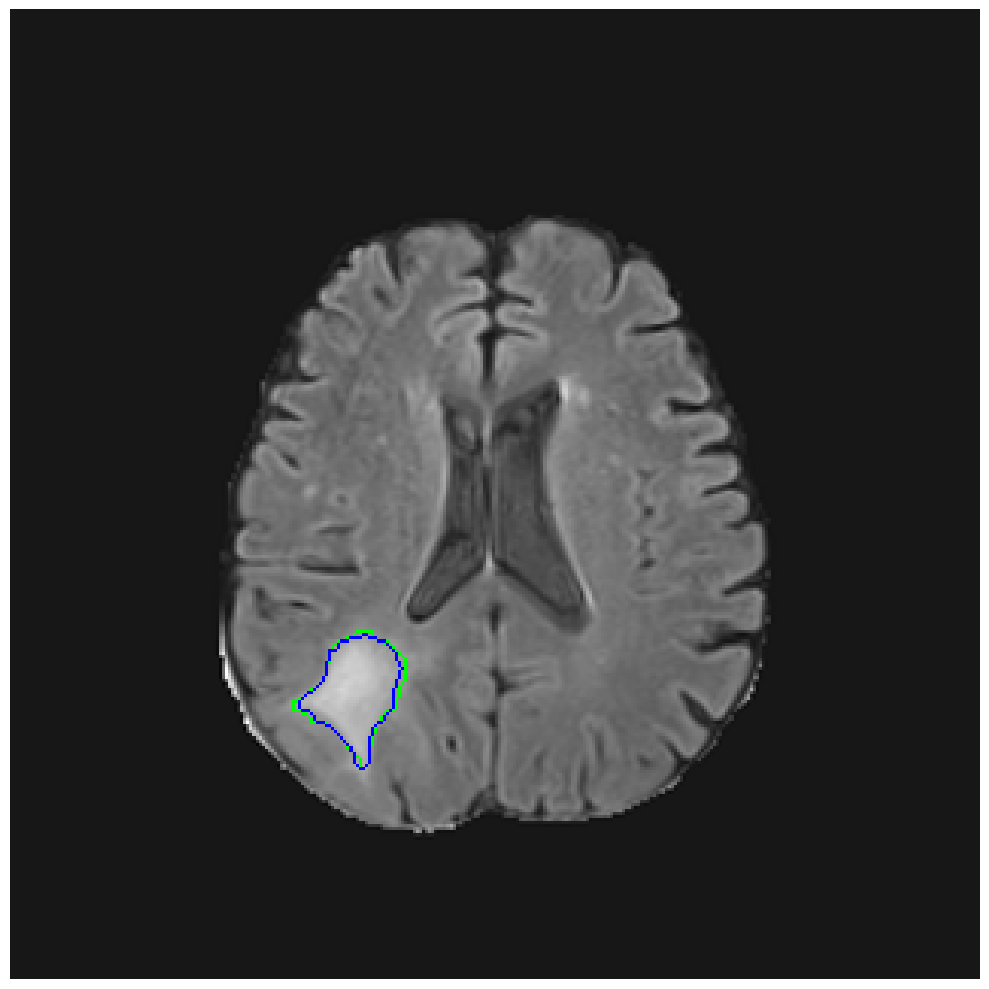

In [13]:
import torch

original_output = None


def hook_fn(module, input, output):
    global  original_output,original_input
    original_input = input
    original_output = output
    return output_o_1480.unsqueeze(0).unsqueeze(0)

hook_handle = model.conv1.register_forward_hook(hook_fn)


# def hook_fn(module, input, output, n_bits):
#     global original_output
#     original_output = output.clone().detach() 

#     tensor_min, tensor_max = output.min(), output.max()
#     normalized_tensor = (output - tensor_min) / (tensor_max - tensor_min)
#     scaled_tensor = normalized_tensor * (2**n_bits - 1)
#     quantized_tensor = torch.round(scaled_tensor).int()  # 转为整数
#     tmp = quantized_tensor.float() / (2**n_bits - 1) * (tensor_max - tensor_min) + tensor_min
#     return tmp

num_correct = 0
num_pixels = 0
dice_score = 0
per_image_dice_scores = []
model.eval()

# hook_handle = model.conv1.register_forward_hook(lambda module, input, output: hook_fn(module, input, output, 4))

with torch.no_grad(): 
    for batch_idx, (x, y) in enumerate(test_loader):
        if batch_idx == closest_diff_indices[0]:
            x = x.to(DEVICE)
            y = y.to(DEVICE).unsqueeze(1)
            
            preds = torch.sigmoid(model(x))
            preds = (preds > 0.5).float()

            num_correct += (preds == y).sum()
            num_pixels += torch.numel(preds)
            dice_score += (2 * (preds * y).sum()) / ((preds + y).sum() + 1e-8)

            batch_size = x.size(0)
            result_image_std = draw_mask_contours_on_grayscale(x.cpu().numpy().squeeze(), y.cpu().numpy().squeeze(), color=(0, 255, 0), thickness=1) 
            result_image_std = draw_mask_contours_on_grayscale(result_image_std, preds.cpu().numpy().squeeze(), color=(255, 0, 0), thickness=1) 
            for i in range(batch_size):
                pred_single = preds[i]
                y_single = y[i]
                dice_single = (2 * (pred_single * y_single).sum()) / ((pred_single + y_single).sum() + 1e-8)
                per_image_dice_scores.append(dice_single.item())

hook_handle.remove()

Pixel_Accuracy = num_correct / num_pixels
Dice_Coefficient = dice_score / len(closest_diff_indices)

# 输出第一层卷积的计算结果
# print("First layer convolution output :", original_input)
print("First layer convolution output :", original_output)

# 返回 Pixel Accuracy 和 Dice Coefficient
print("Pixel Accuracy:", Pixel_Accuracy)
print("Dice Coefficient:", Dice_Coefficient)

print("Dice Coefficient:", per_image_dice_scores)

plt.figure(figsize=(10, 10)) 
    
# 显示带轮廓的图像 
plt.imshow(cv2.cvtColor(result_image_std, cv2.COLOR_BGR2RGB))  # OpenCV的BGR格式转换为RGB 
# plt.title("Grayscale with Mask Contours") 
plt.axis("off") 

# 显示图像 
plt.tight_layout() 
plt.savefig("image_1480_optical_quant.png", dpi=1024, bbox_inches='tight', pad_inches=0)
plt.show()

In [ ]:
tmp_1111=original_output.cpu().numpy().squeeze()-output_conv_1-model.conv1.bias.cpu().detach().numpy()
tmp_1111=tmp_1111.reshape(318*318,1)

print(model.conv1.bias.cpu().detach().numpy())
plt.plot(original_output.cpu().numpy().squeeze().reshape(318*318,1))
# plt.plot(output_conv_1+model.conv1.bias.cpu().detach().numpy())
plt.show()

print(np.sum(model.conv1(original_input[0]).cpu().detach().numpy().squeeze()-original_output.cpu().numpy().squeeze()))


plt.plot(output_conv_1.reshape(318*318,1)+model.conv1.bias.cpu().detach().numpy())
# plt.plot(output_conv_1+model.conv1.bias.cpu().detach().numpy())
plt.show()

plt.plot(output_conv_1.reshape(318*318,1)+model.conv1.bias.cpu().detach().numpy()-original_output.cpu().numpy().squeeze().reshape(318*318,1))
# plt.plot(output_conv_1+model.conv1.bias.cpu().detach().numpy())
plt.show()

# np.savetxt(f"input.csv", original_input[0].cpu().numpy().squeeze(), delimiter=",", fmt="%.5f", comments="")
# np.savetxt(f"output.csv", original_output.cpu().numpy().squeeze()-model.conv1.bias.cpu().detach().numpy(), delimiter=",", fmt="%.5f", comments="")

print(model.conv1.state_dict())



NameError: name 'original_output' is not defined

[0.48368534]


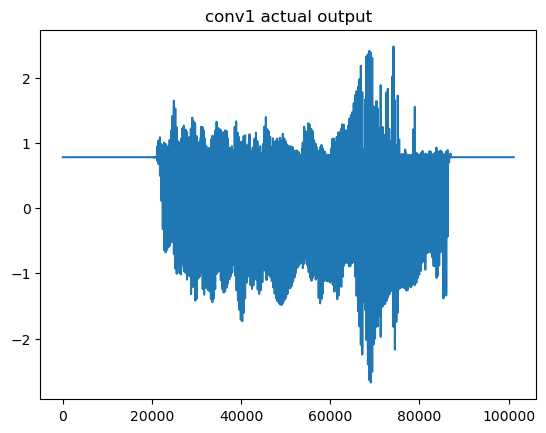

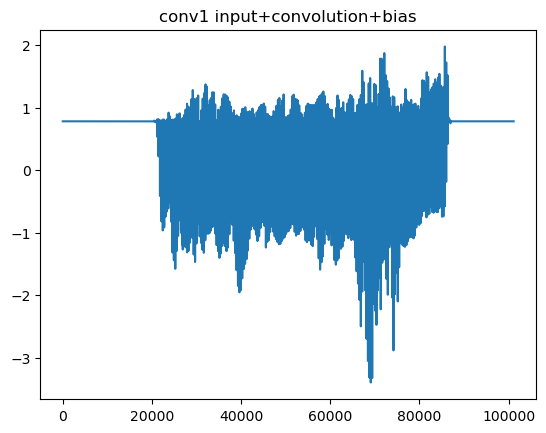

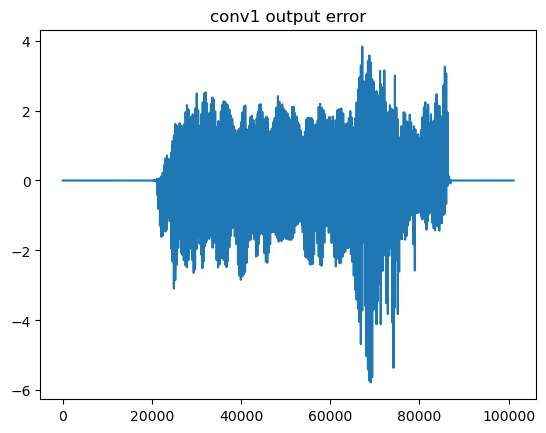

In [11]:

print(model.conv1.bias.cpu().detach().numpy())
plt.plot(model.conv1(original_input[0]).cpu().detach().numpy().squeeze().reshape(318*318,1))
# plt.plot(output_conv_1+model.conv1.bias.cpu().detach().numpy())
plt.title("conv1 actual output") 
plt.show()

# print(np.sum(model.conv1(original_input[0]).cpu().detach().numpy().squeeze()-original_output.cpu().numpy().squeeze()))


plt.plot(output_conv_1.reshape(318*318,1)+model.conv1.bias.cpu().detach().numpy())
# plt.plot(output_conv_1+model.conv1.bias.cpu().detach().numpy())
plt.title("conv1 input+convolution+bias") 
plt.show()

plt.plot(output_conv_1.reshape(318*318,1)+model.conv1.bias.cpu().detach().numpy()-model.conv1(original_input[0]).cpu().detach().numpy().squeeze().reshape(318*318,1))
# plt.plot(output_conv_1+model.conv1.bias.cpu().detach().numpy())
plt.title("conv1 output error") 
plt.show()

# np.savetxt(f"input.csv", original_input[0].cpu().numpy().squeeze(), delimiter=",", fmt="%.5f", comments="")
# np.savetxt(f"output.csv", original_output.cpu().numpy().squeeze()-model.conv1.bias.cpu().detach().numpy(), delimiter=",", fmt="%.5f", comments="")



In [89]:
from torchsummary import summary
summary(model, input_size=(1, 320, 320))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 1, 318, 318]              10
            Conv2d-2         [-1, 64, 318, 318]             576
       BatchNorm2d-3         [-1, 64, 318, 318]             128
              ReLU-4         [-1, 64, 318, 318]               0
            Conv2d-5         [-1, 64, 318, 318]          36,864
       BatchNorm2d-6         [-1, 64, 318, 318]             128
              ReLU-7         [-1, 64, 318, 318]               0
        DoubleConv-8         [-1, 64, 318, 318]               0
         MaxPool2d-9         [-1, 64, 159, 159]               0
           Conv2d-10        [-1, 128, 159, 159]          73,728
      BatchNorm2d-11        [-1, 128, 159, 159]             256
             ReLU-12        [-1, 128, 159, 159]               0
           Conv2d-13        [-1, 128, 159, 159]         147,456
      BatchNorm2d-14        [-1, 128, 1

In [44]:
tmp1=original_output.cpu().numpy().squeeze()
print(tmp1)
np.savetxt(f"output_conv1-1.csv", tmp1, delimiter=",", fmt="%.5f", comments="")


[[0.78070045 0.78070045 0.78070045 ... 0.78070045 0.78070045 0.78070045]
 [0.78070045 0.78070045 0.78070045 ... 0.78070045 0.78070045 0.78070045]
 [0.78070045 0.78070045 0.78070045 ... 0.78070045 0.78070045 0.78070045]
 ...
 [0.78070045 0.78070045 0.78070045 ... 0.78070045 0.78070045 0.78070045]
 [0.78070045 0.78070045 0.78070045 ... 0.78070045 0.78070045 0.78070045]
 [0.78070045 0.78070045 0.78070045 ... 0.78070045 0.78070045 0.78070045]]


Loaded metrics from file:
Epoch History: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]
Train Loss History: [0.37038404382104, 0.0718333214774904, 0.0294967267590646, 0.0204625701650249, 0.0175457376120171, 0.0160176922224831, 0.0147342310664547, 0.0138527281980509, 0.0134562240133734, 0.0124401681751326, 0.0125391171248381, 0.0113834874183022, 0.0109252291982965, 0.0108360767350036, 0.0102283475195889, 0.0100382600818656, 0.009624231807521, 0.009941616952185, 0.0090278947451041, 0.0090118785324704, 0.0088494826025899, 0.0086137649173346, 0.0083761

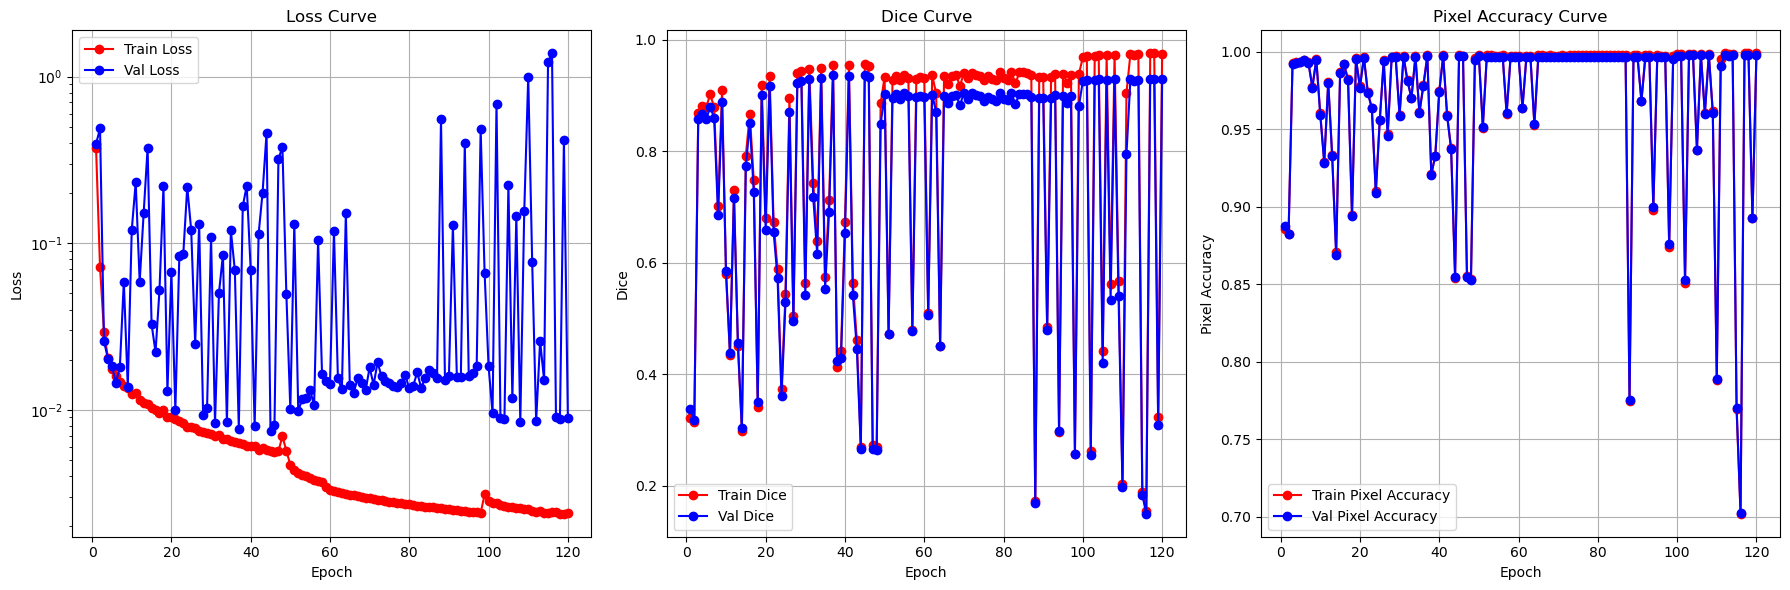

In [ ]:
import os
import pandas as pd
import torch
import matplotlib.pyplot as plt
from train import (
    METRICS_FILE,
    load_metrics_from_file,
)

if __name__ == "__main__":
    (
        epoch_history,
        train_loss_history,
        val_loss_history,
        train_dice_history,
        val_dice_history,
        train_pc_history,
        val_pc_history,
    ) = load_metrics_from_file()

    print("Loaded metrics from file:")
    print(f"Epoch History: {epoch_history}")
    print(f"Train Loss History: {train_loss_history}")
    print(f"Validation Loss History: {val_loss_history}")
    print(f"Train Dice History: {train_dice_history}")
    print(f"Validation Dice History: {val_dice_history}")
    print(f"Train Pixel Accuracy History: {train_pc_history}")
    print(f"Validation Pixel Accuracy History: {val_pc_history}")

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns
    
    axs[0].plot(epoch_history, train_loss_history, "r-o", label="Train Loss")
    axs[0].plot(epoch_history, val_loss_history, "b-o", label="Val Loss")
    axs[0].set_title("Loss Curve")
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("Loss")
    axs[0].legend()
    axs[0].grid(True)
    axs[0].set_yscale("log")

    axs[1].plot(epoch_history, train_dice_history, "r-o", label="Train Dice")
    axs[1].plot(epoch_history, val_dice_history, "b-o", label="Val Dice")
    axs[1].set_title("Dice Curve")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Dice")
    axs[1].legend()
    axs[1].grid(True)

    axs[2].plot(epoch_history, train_pc_history, "r-o", label="Train Pixel Accuracy")
    axs[2].plot(epoch_history, val_pc_history, "b-o", label="Val Pixel Accuracy")
    axs[2].set_title("Pixel Accuracy Curve")
    axs[2].set_xlabel("Epoch")
    axs[2].set_ylabel("Pixel Accuracy")
    axs[2].legend()
    axs[2].grid(True)

    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
import scipy.io
import os

# 加载 .mat 文件
k = scipy.io.loadmat('x_test_256.mat')
z = k['gene_features']

SampleFre = 60e9
f_zhupin = 2.5e9
len = int(SampleFre / f_zhupin * 2)
t2 = np.arange(1/SampleFre, len/SampleFre + 1/SampleFre, 1/SampleFre)

# 创建存储目录
output_dir = '0811'
os.makedirs(output_dir, exist_ok=True)

# 遍历每个 step
for step in range(1, 5):
    z1 = z[(step-1)*5:step*5, :, :]
    z2 = np.transpose(z1, (2, 1, 0))
    
    k_csv1 = z2.flatten()
    k_csv2 = np.round(k_csv1 * 4095).astype(int)
    
    k_csv3 = np.floor(k_csv2 / 64).astype(int)
    k_csv4 = np.mod(k_csv2, 64).astype(int)
    
    k_csv3 = k_csv3 / 63
    k_csv4 = k_csv4 / 63

    k1_csv = np.concatenate([np.zeros(512-128-128), np.ones(128), np.zeros(128), k_csv3, np.zeros(512)])
    k2_csv = np.concatenate([np.zeros(512-128-128), np.ones(128), np.zeros(128), k_csv4, np.zeros(512)])
    
    pic_csv_1 = np.zeros(len * len(k1_csv))
    for i in range(len(k1_csv)):
        pic_csv_1[i*len:(i+1)*len] = k1_csv[i] * np.sin(2 * np.pi * f_zhupin * t2)
    
    pic_csv_2 = np.zeros(len * len(k2_csv))
    for i in range(len(k2_csv)):
        pic_csv_2[i*len:(i+1)*len] = k2_csv[i] * np.sin(2 * np.pi * f_zhupin * t2)
    
    # 保存为 CSV 文件
    np.savetxt(os.path.join(output_dir, f'csv_heibai_60G_25_{step}_1.csv'), pic_csv_1, delimiter=',')
    np.savetxt(os.path.join(output_dir, f'csv_heibai_60G_25_{step}_2.csv'), pic_csv_2, delimiter=',')


In [ ]:
# Plot and save training metrics
plt.plot(epoch_history, train_loss_history, "r-o", label="Train Loss")
plt.plot(epoch_history, val_loss_history, "b-o", label="Val Loss")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.savefig("loss_curve.png", dpi=1024)
plt.cla()

plt.plot(epoch_history, train_dice_history, "r-o", label="Train Dice")
plt.plot(epoch_history, val_dice_history, "b-o", label="Val Dice")
plt.title("Dice Curve")
plt.xlabel("Epoch")
plt.ylabel("Dice")
plt.legend()
plt.grid(True)
plt.savefig("dice_curve.png", dpi=1024)
plt.cla()

plt.plot(epoch_history, train_pc_history, "r-o", label="Train Pixel Accuracy")
plt.plot(epoch_history, val_pc_history, "b-o", label="Val Pixel Accuracy")
plt.title("Pixel Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Pixel Accuracy")
plt.legend()
plt.grid(True)
plt.savefig("pixel_accuracy_curve.png", dpi=1024)
plt.cla()